# Shoreline Refinement Experimentation 
<a target="_blank" href="https://colab.research.google.com/github/Wzesk/coastal_geotools_demo/blob/main/sample_shoreline_refinement.ipynb">
<img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

This notebook illustrates tools to refine satellite derived shorelines, particularly those extracted from low resolution imagery. 
This project draws extensive inspiration from the [Coastsal Project](https://github.com/kvos/CoastSat) described in detail here:

Vos K., Splinter K.D., Harley M.D., Simmons J.A., Turner I.L. (2019). CoastSat: a Google Earth Engine-enabled Python toolkit to extract shorelines from publicly available satellite imagery. Environmental Modelling and Software. 122, 104528. https://doi.org/10.1016/j.envsoft.2019.104528 (Open Access)

This refinement process is one module in a open source modular toolkit intended provide shoreline extraction with interchangable parts that take advantage of rapidly improving machine learning models.


## install dependencies

In [1]:
import sys
IN_COLAB = 'google.colab' in sys.modules

prepath = "sample/"

if IN_COLAB:
    !git clone https://github.com/Wzesk/littoral_refine
    !pip install simplification
    !pip install geomdl
    !pip install numpy==1.26.4
    !pip install aquarel
    sys.path.append('/content/littoral_refine')
    # adjust path for colab
    prepath = "/content/littoral_refine/sample/"
else:
    print("not running in google colab, create a conda env using:  'conda env create -f environment.yml'")
    import matplotlib.pyplot as plt
    import numpy as np

not running in google colab, create a conda env using:  'conda env create -f environment.yml'


In [2]:
if IN_COLAB:
  from littoral_refine import extract_boundary, refine_boundary
else:
  #assuming notebook is running in same folder as dependencies
  import extract_boundary 
  import refine_boundary

## Periodic Shoreline (island) Example

describe the process

Setting inputs and extracting an intial boundary.  

A buffer mask is also extracted. The buffer is onlyy used for testing, comparing to the refinement methods used in the [Coastsal Project](https://github.com/kvos/CoastSat).

In [3]:
# definte the inputs
mask_filepath = prepath + '20241211T052119_20241211T052515_T43NCE_mask.png'
img_path =      prepath + '20241211T052119_20241211T052515_T43NCE_sr.png'

shoreline, buffer, shoreline_filepath = extract_boundary.get_shoreline(mask_filepath,simplification=0.5,smoothing=2)

### refine shoreline - slope

run the shore-normal refinement (one type of refinement) and visualize the results

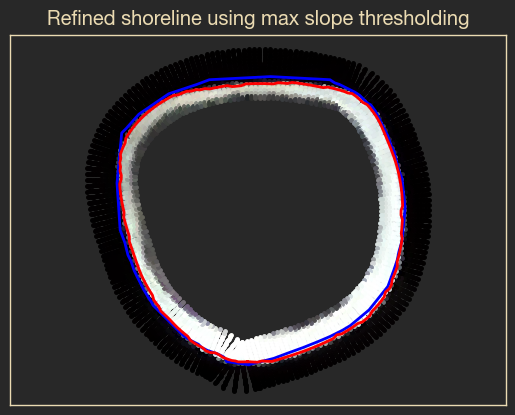

In [4]:
# initialize a new refiner
refiner = refine_boundary.boundary_refine(shoreline_filepath, img_path)
# use the normal thresholding to refine the extracted shoreline
refiner.normal_thresholding()
#visualize the result of refinement
refiner.visualize_results(draw_image=False,draw_sampling=True,title="Refined shoreline using max slope thresholding")

### Visualizing the NIR reflectance at Transects

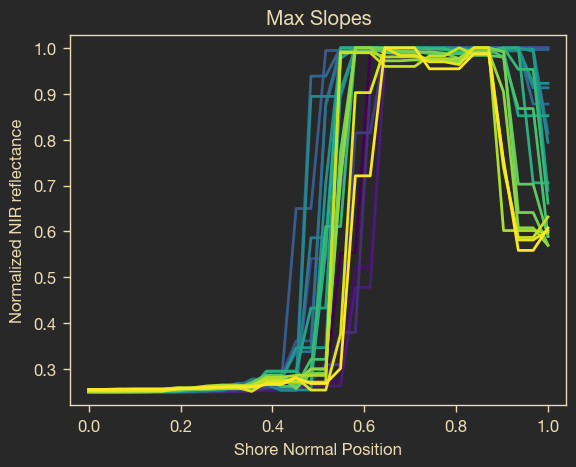

In [5]:
refiner.visualize_max_slopes(bounds=slice(0,25))

### Using the same refiner (same island) 

Test out an alternate refiner using K-Means clustering at each transect.

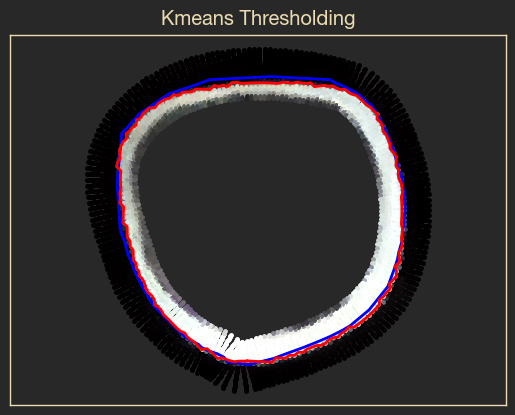

In [6]:
refiner.kmeans_thresholding()
refiner.visualize_results(draw_image=False,draw_sampling=True,title="Kmeans Thresholding")

### Visualize the Clustering at each transect

show

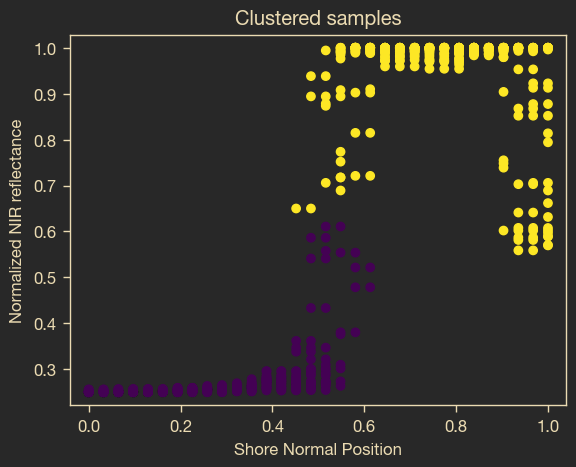

In [7]:
refiner.visualize_clusters(bounds=slice(0, 25))

In [8]:
refiner.clustered_samples[0].shape


(32, 3)

## Non-Periodic Shoreline (island) Example

describe the process

In [9]:
# definte the inputs
np_mask_filepath = prepath + 'non-periodic/20240114T153611_20240114T153753_T19TDG_nir_mask.png'
np_img_path =      prepath + 'non-periodic/20240114T153611_20240114T153753_T19TDG_nir_up.png'

np_shoreline, np_buffer, np_shoreline_filepath = extract_boundary.get_shoreline(np_mask_filepath,simplification=0.5,smoothing=2,periodic=False)

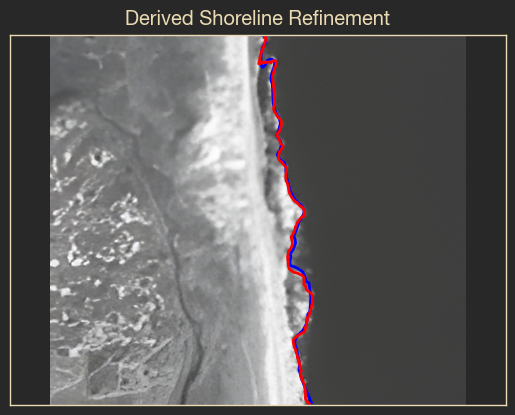

In [10]:
# initialize a new refiner
np_refiner = refine_boundary.boundary_refine(np_shoreline_filepath, np_img_path,periodic=False)
# use the normal thresholding to refine the extracted shoreline
np_refiner.normal_thresholding()
#visualize the result of refinement
np_refiner.visualize_results(draw_image=True,draw_sampling=False)

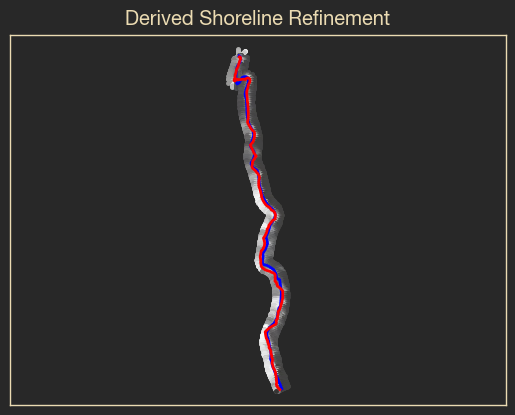

In [11]:
np_refiner.visualize_results(draw_image=False,draw_sampling=True)

float division by zero


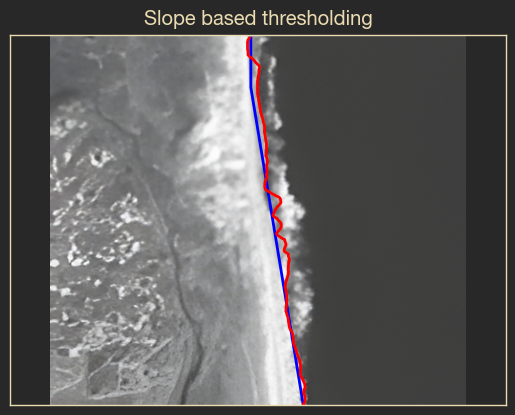

In [12]:
simple_shoreline_path = prepath + 'non-periodic/simple_shore_sl.csv'
# initialize a new refiner
np_refiner = refine_boundary.boundary_refine(simple_shoreline_path, np_img_path,periodic=False)
# use the normal thresholding to refine the extracted shoreline
np_refiner.sample_size = 30
np_refiner.normal_thresholding()
#visualize the result of refinement
np_refiner.visualize_results(draw_image=True,draw_sampling=False,title="Slope based thresholding")


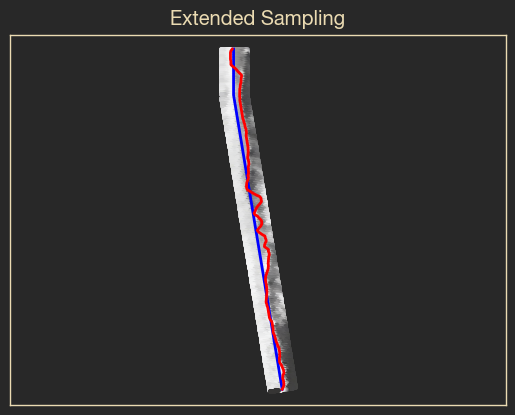

In [13]:
np_refiner.visualize_results(draw_image=False,draw_sampling=True,title="Extended Sampling")

float division by zero


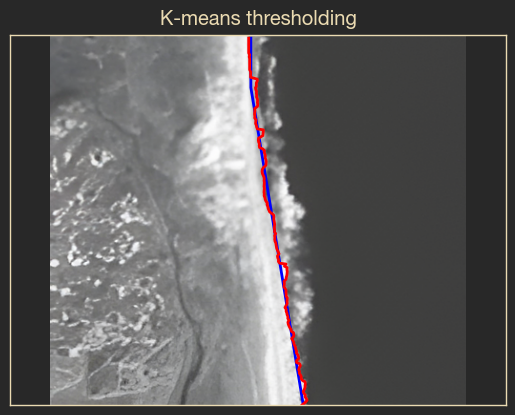

In [14]:
np_refiner.kmeans_thresholding()
np_refiner.visualize_results(draw_image=True,draw_sampling=False,title="K-means thresholding")

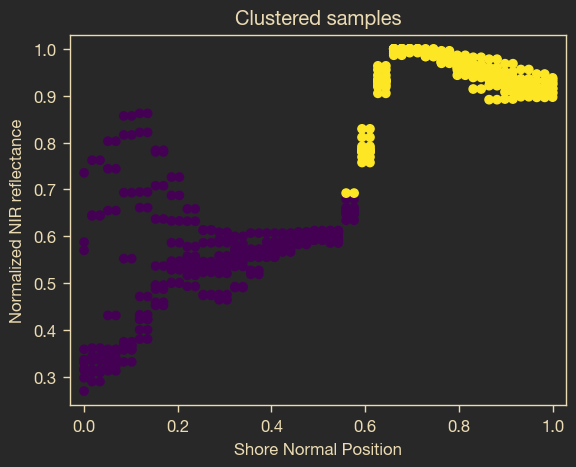

In [15]:
np_refiner.visualize_clusters(bounds=slice(0,10))